In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
category = df.select_dtypes(include=['object','category'])
encoder = LabelEncoder()
for x in category:
    df[x] = encoder.fit_transform(df[x])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
# 	Correlation Analysis
df2 = df[['charges', 'age', 'region']]
corr = df2.corr()
corr

,charges,age,region
charges,1.000000,0.299008,-0.006208
age,0.299008,1.000000,0.002127
region,-0.006208,0.002127,1.000000


<Axes: >

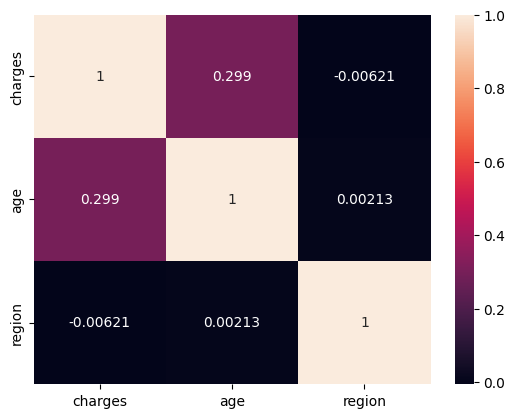

In [7]:
sns.heatmap(corr,annot=True, fmt = '0.3g')

In [8]:
X = df.drop(['charges'],axis = 1) 
Y = df['charges'] 

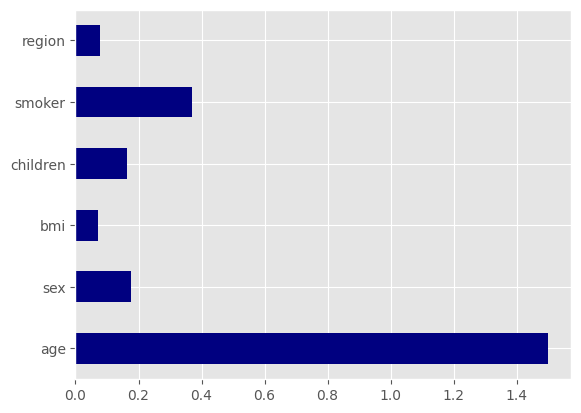

In [9]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
plt.style.use('ggplot')
importance = mutual_info_regression(X,Y)
feature_impor = pd.Series(importance,X.columns[0:len(X.columns)])
feature_impor.plot(kind = 'barh', color = 'navy')
plt.show()

In [10]:
# Data Splitting
# split the data for testing and training
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size=0.2,random_state=1)

In [11]:
LinearModel = LinearRegression() 
LinearModel.fit(xtrain,ytrain) 

LinearRegression()

In [12]:
pred1 = LinearModel.predict(xtest) # predicting to validate the model
pred1

array([ 4312.08656955, 12859.49737555, 12370.50358911, 13549.5511475 ,
         410.55490166, 32052.76977091, 13170.26923221, 12248.5052133 ,
        3713.54941225, 29760.32281711, 11338.50159148, 17269.6492891 ,
        8961.13430709,  8184.25429812,  3376.85292436, 10278.37012511,
        3883.36513262,  6793.01504696, 15270.57009799, 14255.67564306,
       12438.83818074, 33176.73034139,  9068.32669468,  8835.62475682,
        2922.83938461,  8155.7017465 ,  9497.57563203, 11015.04509043,
        7503.17666222,  4307.99883589, 13939.03683704,  5657.88640469,
       34592.37757194, 26941.6112407 , 33661.91509295,  9552.53576302,
       30183.50964412, 26485.52800009, 15397.47566838, 33857.57796843,
        6575.23382913, 14015.49951905, 11034.83628114, 14878.37537422,
        4056.87355672, 13036.25142266,  4582.39598034, 28857.50476848,
        7305.25026916, 14215.34197814, 13570.38542044, 12171.25378059,
        1860.5537778 ,  8743.00482524, 25989.68277284, 10318.04975471,
      

In [13]:
print('MAE', mean_absolute_error(ytest,pred1))
print('MSE', mean_squared_error(ytest,pred1))
print('R2 SCORE', r2_score(ytest,pred1))
print('MAPE',mean_absolute_percentage_error(ytest,pred1))

MAE 4056.118305662652
MSE 35480663.81217908
R2 SCORE 0.7623224022563388
MAPE 0.41027328055887846


In [14]:
outcome = {
    'Actual Price':ytest,
    'Predicted Price':pred1
}
df = pd.DataFrame(outcome)
df

,Actual Price,Predicted Price
559,1646.42970,4312.086570
1087,11353.22760,12859.497376
1020,8798.59300,12370.503589
460,10381.47870,13549.551148
802,2103.08000,410.554902
...,...,...
682,40103.89000,33330.127561
629,42983.45850,35851.350344
893,44202.65360,36871.781092
807,2136.88225,4885.664416


In [15]:
# training another model
tree = DecisionTreeRegressor()
tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [16]:
pred2 = tree.predict(xtest) # predicting to validate the model
pred2

array([ 1137.011  , 11842.62375,  8457.818  ,  8280.6227 ,  1964.78   ,
       39983.42595,  8978.1851 , 11658.37915,  3857.75925, 20296.86345,
       13012.20865, 12646.207  ,  6313.759  ,  6496.886  ,  1137.011  ,
        8062.764  ,  4185.0979 ,  5926.846  , 27941.28758, 13844.7972 ,
        9140.951  , 40419.0191 ,  7421.19455,  8601.3293 , 21344.8467 ,
        6393.60345,  6067.12675,  8280.6227 ,  5836.5204 ,  3857.75925,
       10601.412  ,  5124.1887 , 35069.37452, 36898.73308, 21978.6769 ,
       10422.91665, 44585.45587, 16232.847  , 11365.952  , 39556.4945 ,
        5138.2567 , 12231.6136 , 10702.6424 , 16085.1275 ,  4934.705  ,
       12129.61415,  1980.07   , 37270.1512 ,  9361.3268 , 13224.05705,
       13143.86485, 12105.32   ,  2395.17155,  9414.92   , 16450.8947 ,
        3989.841  , 40974.1649 , 13844.7972 , 14426.07385,  1146.7966 ,
        2689.4954 , 13143.86485, 35147.52848,  2850.68375, 13228.84695,
       26392.26029, 10156.7832 , 12032.326  ,  2710.82855, 14455

In [17]:
print('MAE', mean_absolute_error(ytest,pred2))
print('MSE', mean_squared_error(ytest,pred2))
print('R2 SCORE', r2_score(ytest,pred2))
print('MAPE',mean_absolute_percentage_error(ytest,pred2))

MAE 2598.192157873134
MSE 32552683.55437392
R2 SCORE 0.7819363338783599
MAPE 0.2797707704801156


In [18]:
outcome = {
    'Actual Price':ytest,
    'Predicted Price':pred1
}
df2 = pd.DataFrame(outcome)
df2

,Actual Price,Predicted Price
559,1646.42970,4312.086570
1087,11353.22760,12859.497376
1020,8798.59300,12370.503589
460,10381.47870,13549.551148
802,2103.08000,410.554902
...,...,...
682,40103.89000,33330.127561
629,42983.45850,35851.350344
893,44202.65360,36871.781092
807,2136.88225,4885.664416


<Axes: xlabel='charges'>

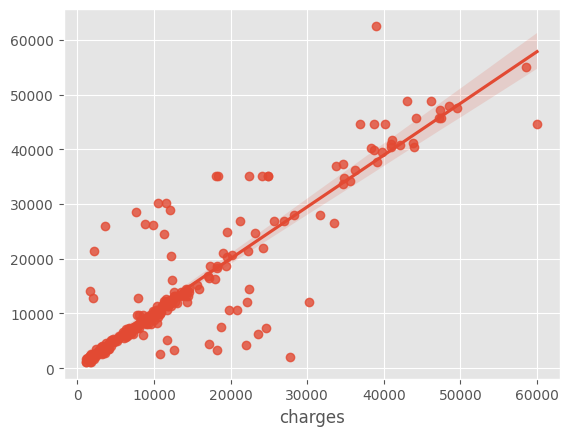

In [19]:
sns.regplot(x = ytest,y = pred2) 